In [27]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [28]:
class AgentState(TypedDict):
    num1: int
    operation1: str
    num2: int
    finalNumber1: int
    num3: int
    operation2: str
    num4: int
    finalNumber2: int

In [29]:
def adder1(state: AgentState) -> AgentState:
     """This node adds two numbers."""
     state['finalNumber1'] = state['num1'] + state['num2']
     return state
def subtractor1(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['finalNumber1'] = state['num1'] - state['num2']
    return state

def decider1(state: AgentState) -> AgentState:
    """This node decides whether to add or subtract based on the operation."""
    if state['operation1'] == '+':
        return "first_addition_operation"
    elif state['operation1'] == '-':
        return "first_subtraction_operation"
 
def adder2(state: AgentState) -> AgentState:
    """This node adds two numbers."""
    state['finalNumber2'] = state['num3'] + state['num4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """This node subtracts two numbers."""
    state['finalNumber2'] = state['num3'] - state['num4']
    return state

def decider2(state: AgentState) -> AgentState:
    """This node decides whether to add or subtract based on the operation."""
    if state['operation2'] == '+':
        return "second_addition_operation"
    elif state['operation2'] == '-':
        return "second_subtraction_operation"

In [30]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder1)
graph.add_node("subtract_node", subtractor1)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", adder2)
graph.add_node("subtract_node2", subtractor2)
graph.add_node("router2", lambda state:state)


graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decider1,
    {
        # Edge labels returned by the decider function
        "first_addition_operation": "add_node",
        "first_subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2",
    decider2,
    {
        # Edge labels returned by the decider function
        "second_addition_operation": "add_node2",
        "second_subtraction_operation": "subtract_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()

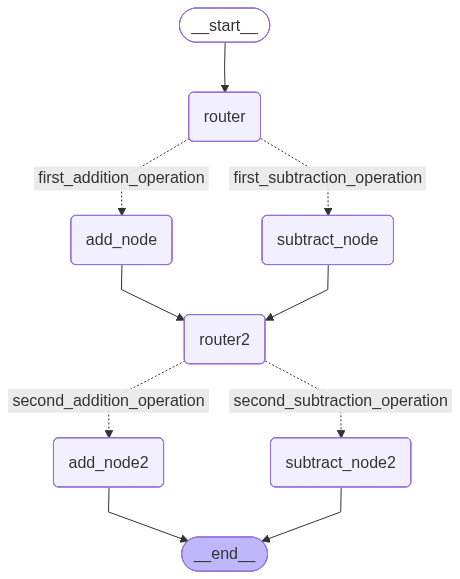

In [31]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
initial_state_1 = AgentState(num1=10, operation1='-', num2=5, num3=20, operation2='+', num4=10)
print(app.invoke(initial_state_1))  # Should perform addition

{'num1': 10, 'operation1': '-', 'num2': 5, 'finalNumber1': 5, 'num3': 20, 'operation2': '+', 'num4': 10, 'finalNumber2': 30}
